<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [655]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [692]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [721]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS.txt',delimiter='~')
data['ANIO_BAJA'].replace([2019,2020],[1,0],inplace=True)
x  = data.iloc[:,:-1].values
y  = data.iloc[:,3].values 
y = y[:,np.newaxis]

In [719]:
data.info()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ANIO_BAJA         132 non-null    int64
 1   MES_BAJA          132 non-null    int64
 2   GRUPO_ANTIGUEDAD  132 non-null    int64
 3   TOTAL_BAJAS       132 non-null    int64
dtypes: int64(4)
memory usage: 4.2 KB


In [720]:
data.dtypes 

ANIO_BAJA           int64
MES_BAJA            int64
GRUPO_ANTIGUEDAD    int64
TOTAL_BAJAS         int64
dtype: object

In [ ]:
x[:,1]

In [725]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder= LabelEncoder()
#x[:,0] = labelencoder.fit_transform(x[:,0])
#x[:,2] = labelencoder.fit_transform(x[:,2])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[0,2])],remainder='passthrough')
### remainder='passthrough'. deja el resto de las columnas en pié
x=np.array(ct.fit_transform(x),dtype=np.int)

x = x[:,1:]

In [ ]:
x.shape

In [ ]:
pd.DataFrame(x)

In [729]:
#selección de caracteristicas basadas en L1
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
model = SelectFromModel(lsvc, prefit=True)
x2 = model.transform(x)
x2.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(132, 1)

In [ ]:
pd.DataFrame(x2)

In [730]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(x2,y,test_size=0.2, random_state=0)                                 

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

#Modelo vectores de soporte
svc = SVC()
svc.fit(x_train,y_train)
y_predic_test_m2 = svc.predict(x_test)
#y_predic_train_m2 = svc.predict(x_train)
print('Precisión Vectores de soporte')
print(svc.score(x_train,y_train))
 

Precisión Modelo Regresión Logística
0.08571428571428572
Precisión Vectores de soporte
0.09523809523809523


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [665]:
y_predic_train_m2 = y_predic_train_m2[:,np.newaxis]  

In [671]:
print(y_test)

[[326]
 [ 99]
 [686]
 [343]
 [ 20]
 [ 18]
 [  2]
 [ 19]
 [247]
 [ 54]
 [ 26]
 [ 44]
 [ 74]
 [168]
 [350]
 [484]
 [142]
 [746]
 [ 38]
 [ 28]
 [ 42]
 [ 35]
 [ 33]
 [741]
 [190]
 [ 88]
 [726]]


In [673]:
y_predic_test_m2  
 

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19])

In [651]:
for _ in x_test:
  print(_)


[6 7]
[7 5]
[4 2]
[8 5]
[12  6]
[5 2]
[12  2]
[2 3]
[10  3]
[11  3]
[1 6]
[1 3]
[3 2]
[6 6]
[12  1]
[7 7]
[5 3]


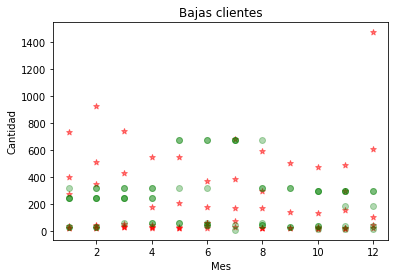

In [635]:
#gráfica
#plt.scatter(x[:,0], y, c='Blue', marker='^', alpha=0.5)
plt.scatter(x_test[:,0] , y_test , c='red', marker='*', alpha=0.5)
#plt.scatter(x, y_predic_train_m2, c='green', marker='o', alpha=0.3)
plt.scatter(x_test[:,0] , y_predic_test_m2 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes')
plt.show()